# Data Science 2
## Numerical analysis - Root finding

The following material is largely covered in Chapter 4 - *Roots of Equations* of the book *Numerical methods in engineering with Python 3* by Jaan Kiusalaas (see BlackBoard).

### Introduction

A common problem encountered in engineering analysis is as follows: Given a function $f(x)$, determine the values of $x$ for which $f(x) = 0$. The solutions (values of $x$) are known as the *roots* of the equation $f(x) = 0$, or the *zeroes* of the function $f(x)$. Almost *any* equation that requires solving can be written this way by moving the terms on the right hand side of the equation to the left hand side.

All methods of finding roots are iterative procedures that require a starting point (i.e., an estimate of the root). This estimate is crucial; a bad starting value may fail to converge, or it may converge to the "wrong" root (a root different from the one sought). It is highly advisable to go a step further and *bracket* the root (determine its lower and upper bounds) before passing the problem to a root-finding algorithm.

### Incremental Search Method

The basic idea behind the incremental search method is simple: If $f(x_1)$ and $f(x_2)$ have opposite signs, then there is at least one root in the interval $(x_1, x_2)$. If the interval is small enough, it is likely to contain a single root. Thus the zeros of $f(x)$ can be detected by evaluating the function at intervals $\Delta x$ and looking for a change in sign.

There are several potential problems with the incremental search method:

- It is possible to miss two closely spaced roots if the search increment $\Delta x$ is larger than the spacing of the roots.

- A double root (two roots that coincide) will not be detected.

- Certain singularities (poles) of $f(x)$ can be mistaken for roots.

Below you find a generator function `rootsearch` that divides an interval $(a, b)$ into `steps` equal intervals and then sequentially returns the intervals for which the function values of a function `f` brackets a root based on a change in sign of the function.

In [1]:
def rootsearch(f, a, b, steps):
    """lo, hi = rootsearch(f, a, b, steps).
    Searches the interval (a,b) in a number of steps for
    the bounds (lo,hi) of the roots of f(x).
    """
    h = (b - a) / steps
    f_lo = f(a)
    for step in range(steps):
        lo = a + step * h
        hi = lo + h
        f_hi = f(hi)
        if f_lo * f_hi <= 0.0:
            yield lo, hi
        f_lo = f_hi

We apply the method to an example where we look for a solution to $\cos(x) = x$. This is equivalent to finding a root of the function $f(x) = \cos(x) - x$. The [unique solution](https://www.wolframalpha.com/input/?i=solve+cos%28x%29%3Dx) is $x \approx 0.7390851332151606416$.

0.72 < 0.7390851332151607 < 0.74


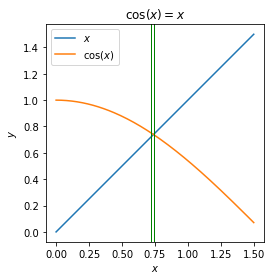

In [7]:
# Example: Solve cos(x) = x
from math import sin, cos
func = lambda x: cos(x) - x       # the function, for now
dfunc = lambda x: -sin(x) - 1.0   # the derivative, for later
solution = 0.7390851332151606416

for lo, hi in rootsearch(func, 0.0, 1.0, 50):
    print(lo, '<', solution, '<', hi)

%matplotlib inline
import matplotlib.pyplot as plt
qx = [i/100.0 for i in range(151)]
qy = [cos(x) for x in qx]

plt.plot(qx, qx, label='$x$')
plt.plot(qx, qy, label='$\cos(x)$')
plt.axvline(x=lo, linewidth=1, color='g'); plt.axvline(x=hi, linewidth=1, color='g')
plt.title('$\cos(x)=x$'); plt.xlabel('$x$'); plt.ylabel('$y$'); plt.axis('square'); plt.legend(); plt.show()

### Method of Bisection

After a root of $f(x) = 0$ has been bracketed in the interval $(x_1, x_2)$, several methods can be used to close in on it. The [method of bisection](https://en.wikipedia.org/wiki/Bisection_method) accomplishes this by successively halving the interval until it becomes sufficiently small. Once a root has been bracketed, bisection will always close in on it.

The method of bisection uses the same principle as incremental search: If there is a root in the interval $(x_1, x_2)$, then $f(x_1)$ and $f(x_2)$ have opposite signs. To halve the interval, we compute $f(x_3)$, where $x_3 = \frac{1}{2}(x_1+x_2)$ is the midpoint of the interval. If $f(x_2)$ and $f(x_3)$ have opposite signs, then the root must be in $(x_3, x_2)$, and we record this by replacing the original bound $x_1$ by $x_3$. Otherwise, the root lies in $(x_1, x_3)$, in which case $x_2$ is replaced by $x_3$. In either case, the new interval $(x_1, x_2)$ is half the size of the original interval. The bisection is repeated until the interval has been reduced to a small value $\varepsilon$, so that $\left| x_2−x_1 \right| \leq \varepsilon$.

**Exercise 1**

Complete the below function `bisection` that incrementally bisects an interval $(a, b)$ that is known to bracket a root until the size of the interval $\varepsilon$ becomes smaller than some tolerance `tol` (for which you may choose a suitable default value).

Note: Assume that the evaluation of `f` is computationally intensive, so minimize the number of function evaluations (i.e. do not evaluate the function twice for the same argument value)!

In [17]:
def bisection(f, a, b, tol=1e-4): # does not work in casse of negative slope
    """root = bisection(f, a, b, tol=...).
    Finds a root of f(x) = 0 by bisection.
    The root must be bracketed in (a,b).
    """
    count = 0
    lo, f_lo = a, f(a)
    if f_lo == 0.0:
        return lo, f_lo
    hi, f_hi = b, f(b)
    if f_hi == 0.0:
        return hi, f_hi
    if f_lo * f_hi > 0.0:
        raise ValueError('Root is not bracketed')
    while abs(hi - lo) > tol:
        count += 1
        mid = (hi + lo) / 2.0
        f_mid = f(mid)
        if f_mid == 0.0:
            return mid, f_mid
        if f_mid < 0.0:
            hi = mid
            f_hi = f_mid
        else:
            lo = mid
            f_lo = f_mid
    print(count) 
    return (lo + hi) / 2.0 #, f((lo + hi)/2)

In [19]:
def bisection_2(f, a, b, tol=1e-4):
    """root = bisection(f, a, b, tol=...).
    Finds a root of f(x) = 0 by bisection.
    The root must be bracketed in (a,b).
    """
    count = 0
    lo, f_lo = a, f(a)
    if f_lo == 0.0:
        return lo, f_lo
    hi, f_hi = b, f(b)
    if f_hi == 0.0:
        return hi, f_hi
    if f_lo * f_hi > 0.0:
        raise ValueError('Root is not bracketed')
    while abs(hi - lo) > tol:
        count += 1
        mid = (hi + lo) / 2.0
        f_mid = f(mid)
        if f_mid == 0.0:
            return mid, f_mid
        if (f_mid * f_hi > 0):
            hi = mid
            f_hi = f_mid
        else:
            lo = mid
            f_lo = f_mid
    print(count) 
    return (lo + hi) / 2.0 #, f((lo + hi)/2)

-3.0 < 0 < 3.0
30
30
(-2.0000000009313226, -1.862645149230957e-09)


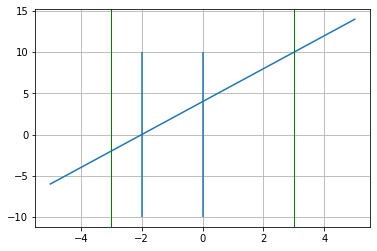

In [10]:
import numpy as np
x = np.linspace(-5., 5., 33)
def func(x):
    return( 2 * x + 4)

for lo, hi in rootsearch(func, -3.0, 3.0, 1):
    print(lo, '<', 0, '<', hi)
    
plt.plot(x,func(x))
plt.grid(True)
plt.axvline(x=lo, linewidth=1, color='g'); plt.axvline(x=hi, linewidth=1, color='g')
plt.vlines(bisection_2(func, lo, hi, tol=1e-8), -10., 10.)
print(bisection_2(func, lo, hi, tol=1e-8))


In [20]:
# Example: Solve cos(x) = x
root = bisection(func, lo, hi, 1e-6)
print(root)
print(f'x: {root} (error={abs(root - solution):8.1e})')

23
2.9999996423721313
x: 2.9999996423721313 (error= 2.3e+00)


### Secant Method

The [secant method](https://en.wikipedia.org/wiki/Secant_method) and the [false position method](https://en.wikipedia.org/wiki/Regula_falsi) are closely related. Both methods require two starting estimates of the root, say, $x_1$ and $x_2$. The function $f(x)$ is assumed to be approximately linear near the root, so that the improved value $x_3$ of the root can be estimated by linear interpolation between $x_1$ and $x_2$. This leads to

$$
x_3 = \frac{f_1 x_2 - f_2 x_1}{f_1 - f_2}
$$

- The *false position* method (also known as *regula falsi*) requires $x_1$ and $x_2$ to bracket the root. After the improved root is computed, either $x_1$ or $x_2$ is replaced by $x_3$: if $f_3$ has the same sign as $f_1$, we let $x_1 \leftarrow x_3$; otherwise we choose $x_2 \leftarrow x_3$. In this manner, the root remains bracketed in $(x_1, x_2)$.

- The *secant* method differs from the false position method in two ways: It does not require prior bracketing of the root, and it discards the oldest prior estimate of the root (i.e., after $x_3$ is computed, we let $x_1, x_2 \leftarrow x_2, x_3)$.

**Exercise 2**

Write a function `secant` that repeatedly applies the interpolation formula and updates the values $x_1$ and $x_2$. Stop when the size of the interval $\varepsilon$ becomes smaller than some tolerance `tol` (with suitable default). The function should return a single number that forms an estimate of the root.

Note: Again, minimize the number of function evaluations!

-3.0 < 0.7390851332151607 < -1.0


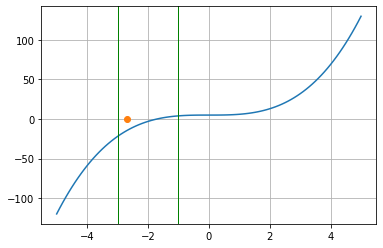

In [21]:
x = np.linspace(-5., 5., 101)
#y = -x ** 3 + 20

def f(x):
    #y = x ** 3 + 20
    y=x**3+5
    return y

for lo, hi in rootsearch(func, -5.0, 5.0, 5):
    print(lo, '<', solution, '<', hi)

c = (f(lo) * lo - f(hi) * hi) / (f(lo) - f(hi))

    
plt.plot(x, f(x))
plt.plot(c, 0., 'o')
plt.grid()
plt.axvline(x=lo, linewidth=1, color='g'); plt.axvline(x=hi, linewidth=1, color='g')
plt.show()

In [22]:
%matplotlib auto
def secant(f, a, b, tol=1e-8): # x,
    """root = secant(f, a, b, tol=...).
    Finds a root of f(x) = 0 by the secant method.
    """
    x1 = a
    f1 = f(x1)
    if f1 == 0:
        return x1
    
    x2 = b
    f2 = f(x2)
    if f2 == 0:
        return x2
    
    # as long as difference between my x values is bigger than the tolerance:
    while abs(x2 - x1) > tol:
        #calculate an new c value
        x3 = (f1 * x2 - f2 * x1) / (f1 - f2)
        f3 = f(x3)

        if f3 == 0:
            return x3
        
        x1, x2, f1, f2 = x2, x3, f2, f3

    return x2

Using matplotlib backend: Qt5Agg


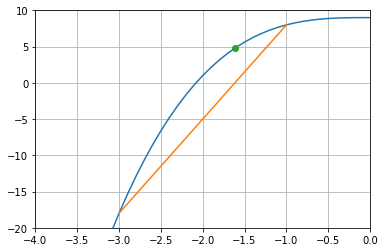

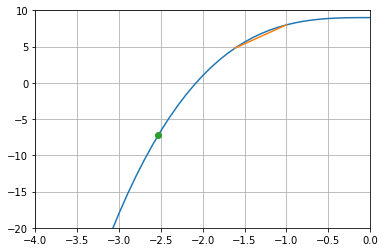

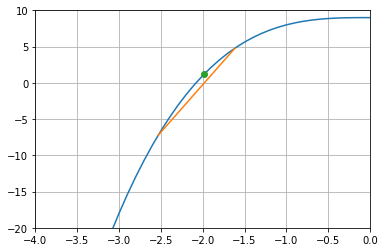

In [23]:
%matplotlib inline
def f(x):
    #y = x ** 3 + 20
    y=x**3+9
    return y

x1 = -3.
x2 = -1.

x3 = (f(x1) * x2 - f(x2) * x1) / (f(x1) - f(x2))
plt.plot(x, f(x))
plt.plot([x1, x2], [f(x1), f(x2)])
plt.plot(x3, f(x3), 'o')
plt.grid()
plt.xlim(-4, -0)
plt.ylim(-20, 10)
plt.show()


x4 = (f(x2) * x3 - f(x3) * x2) / (f(x2) - f(x3))
plt.plot(x, f(x))
plt.plot([x2, x3], [f(x2), f(x3)])
plt.plot(x4, f(x4), 'o')
plt.grid()
plt.xlim(-4, -0)
plt.ylim(-20, 10)
plt.show()

x5 = (f(x3) * x4 - f(x4) * x3) / (f(x3) - f(x4))
plt.plot(x, f(x))
plt.plot([x3, x4], [f(x3), f(x4)])
plt.plot(x5, f(x5), 'o')
plt.grid()
plt.xlim(-4, -0)
plt.ylim(-20, 10)
plt.show()

In [24]:
def f(x):
    #y = x ** 3 + 20
    y=x**3+9
    return y

for lo, hi in rootsearch(func, -5.0, 5.0, 5):
    print(lo, '<', solution, '<', hi)
    
root = secant(f, lo, hi, 1e-6)
print(f'x: {root} (error={abs(root - solution):8.1e})')

-3.0 < 0.7390851332151607 < -1.0
x: -2.080083823051922 (error= 2.8e+00)


In [25]:
# Example: Solve cos(x) = x
root = secant(func, lo, hi, 1e-6)
print(f'x: {root} (error={abs(root - solution):8.1e})')

x: -2.0 (error= 2.7e+00)


In [27]:
def regula_falsi(f, a, b, tol=1e-8, maxiter = 50):
    """
    """
    fa = f(a)
    if fa == 0:
        return a, fa
    
    fb = f(b)
    if fb == 0:
        return b, fb
    
    if fa * fb > 0.0:
        raise ValueError('Root is not bracketed')
    # as long as difference between my x values is bigger than the tolerance:
    
    while maxiter > 0:
        maxiter -= 1
        #calculate an new xn value
        xn = (a * fb - b * fa) / (fb - fa)
        fxn = f(xn)
        #print(fa, fxn, fb)

        if fxn == 0:
            return xn, fxn
        
        elif abs(fxn) < tol:
            return xn, fxn
        
        else:
            if (fxn * fa) > 0:
                a, fa = xn, fxn

            elif (fxn * fb) > 0:
                b, fb = xn, fxn

            else:
                print('bad')
    print('no root found with given maximal number of iterations')

-1.7999999999999998 < -1.5999999999999999
(-1.769292353344932, 6.605498370504392e-09)


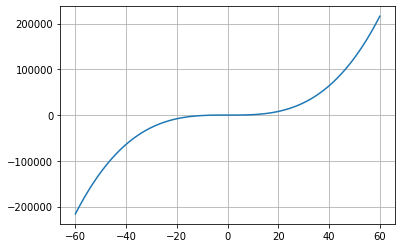

In [41]:
def fu(x):
    y = x**3  - 2*x + 2
    return y
x = np.linspace(-60., 60., 102)
plt.plot(x, fu(x))
plt.grid()

for lo, hi in rootsearch(fu, -5.0, 5.0, 50):
    print(lo, '<', hi)
    print(regula_falsi(fu, lo, hi, tol=1e-8))

### Newton-Raphson Method

The [Newton-Raphson method](https://en.wikipedia.org/wiki/Newton%27s_method) is the best known method of finding roots for a good reason: It is simple and fast. The only drawback of the method is that it uses the derivative $f'(x)$ of the function as well as the function $f(x)$ itself. Therefore, the Newton-Raphson method is usable only in problems where $f'(x)$ can be readily computed.

The algorithm for the Newton-Raphson method is simple: it repeatedly applies

$$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
$$

starting with an initial value $x_0$, until the convergence criterion $\left| x_{i+1} − x_i \right| < \varepsilon$
is reached. Only the latest value of x has to be stored.

**Exercise 3**

The (positive) square root of two, $\sqrt{2} \approx 1.41421$, can be calculated by solving $f(x) = x^2 - 2 = 0$.

- Starting from the bracketing interval $(1, 2)$, analytically perform three iterations of the bisection method.

- Starting from an initial estimate $x_0 = 1$, analytically perform three iterations of the Newton-Raphson algorithm.

Compare the convergence of these methods by completing the following table and checking how many digits of the answers are accurate.

| Iteration i | Bisection (a+b)/2                      | Newton-Raphson $x_i$          |
| :---------: | :------------------------------------: | :---------------------------: |
|      0      | $(1, 2) \rightarrow 1.5$               | $1 \rightarrow 1$             |
|      1      | $(1, \frac{3}{2}) \rightarrow 1.25$    | $\frac{3}{2} \rightarrow 1.5$ |
|      2      | $(\ldots, \ldots) \rightarrow \ldots$  | $\ldots \rightarrow \ldots$   |
|      3      | $(\ldots, \ldots) \rightarrow \ldots$  | $\ldots \rightarrow \ldots$   |

In [9]:
#-------------#-------------------#--------------------#
# Iteration i # Bisection (a+b)/2 # Newton-Raphson x_i #
#-------------#-------------------#--------------------#
#      0      # (1, 2)   -> 1.5   # 1   -> 1.          #
#      1      # (1, 3/2) -> 1.25  # 3/2 -> 1.5         #
#      2      # (.., ..) -> ..    # ..  -> ..          #
#      3      # (.., ..) -> ..    # ..  -> ..          #
#-------------#-------------------#--------------------#

Although the Newton-Raphson method converges fast near the root, its global convergence characteristics are poor. However, the method can be made nearly fail-safe by combining it with bisection.

**Exercise 4**

Write a function `newton_raphson` that repeatedly applies the Newton-Raphson formula to obtain an increasingly better estimate of the root. For a given interval $(a, b)$ that brackets an estimate of the root $x_0$, repeatedly perform Newton-Raphson to improve the estimate of the root. Each time, if the new estimate falls inside the bracket, use it to improve the bracket; if it falls outside, ignore the new estimate and perform bisection instead. Continue until the magnitude of the update according to Newton-Raphson becomes smaller than some tolerance `tol`. The function should return a single number that forms an estimate of the root.

In [44]:
# newton raphson
def newton_raphson(f, df, a, b, tol=1e-8):
    """root = newton_raphson(f, df, a, b, tol=....).
    Finds a root of f(x) = 0 by combining the Newton-Raphson
    method with bisection. The root must be bracketed in (a,b).
    Calls user-supplied functions f(x) and its derivative df(x).
    """
    x0 = (a+b) / 2
    f0 = f(x0)
    df0 = df(x0)
    while True:
        delta = f0 /df0
        x1 = x0 - delta
        if abs(delta) < tol:
            return x1
        x0 = x1
        f0 = f(x0)
        df0 = df(x0)

In [205]:
def newton_raphson_bisection(f, df, a, b, tol=1e-8, maxiter=5):
    """root = newton_raphson(f, df, a, b, tol=....).
    Finds a root of f(x) = 0 by combining the Newton-Raphson
    method with bisection. The root must be bracketed in (a,b).
    Calls user-supplied functions f(x) and its derivative df(x).
    """
    x0 = (a+b) / 2
    f0 = f(x0)
    df0 = df(x0)
    while (maxiter>0):
        maxiter-=1
        delta = f0 /df0
        x1 = x0 - delta
        if abs(delta) < tol:
            return x1
        x0 = x1
        f0 = f(x0)
        df0 = df(x0)        # check whether x1 is inside or outside the brackets:
        print(x0,f0,df0)

        # if (np.minimum(a,b) < x1) & (np.maximum(a,b)> x1):
        #    ## x1 inside brackets
         #   x0 = x1
          #  f0 = f(x0)
           # df0 = df(x0)
        #else:
            #print('else path entered')
            #if (f0 * f(a) > 0):
                #x0 = a
                #f0 = f(x0)
                #df0 = df(x0)
            #else:
                #x0 = b
                #f0 = f(x0)
                #df0 = df(x0)



In [45]:
# Example: Solve cos(x) = x
root = newton_raphson(func, dfunc, lo, hi, 1e-4)
print(lo, hi)
print(f'x: {root} (error={abs(root - solution):8.1e})')

-1.7999999999999998 -1.5999999999999999
x: -1.5707963267948966 (error= 2.3e+00)


x: 1.5707963267948966 (error= 8.3e-01)


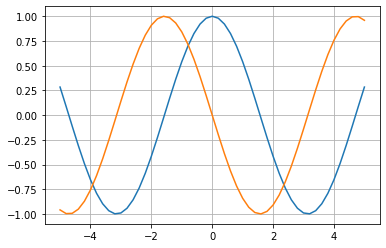

In [46]:
func = lambda x: cos(x)       # the function, for now
dfunc = lambda x: -sin(x)   # the derivative, for later
z = np.linspace(-5.,5.,51)
plt.plot(z, np.cos(z))
plt.plot(z, -np.sin(z))
plt.grid()

root = newton_raphson(func, dfunc, 0., 3., 1e-4)
print(f'x: {root} (error={abs(root - solution):8.1e})')

1.0416254850007025 1.0468956516923744 1.254950953008846
0.20741308077696952 1.5940967877759717 -1.870939441767819
1.0594432171825265 1.0702537477637972 1.3672597913021862
0.2766704372235099 1.467837287706613 -1.7703604074996555
1.1057882154389034 1.140545546435821 1.6683027322106643


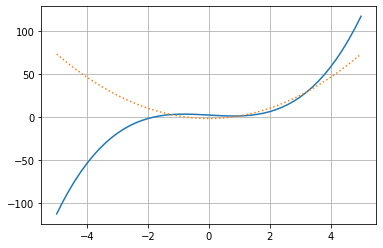

In [229]:
def fu(x):
    y = x **3 -2 * x + 2
    return y
def dfu(x):
    y = 3 * x ** 2 -2
    return y
plt.plot(z, fu(z))
plt.plot(z, dfu(z), ':')
plt.grid()
root = newton_raphson_bisection(fu, dfu, 2.09, 1., 1e-4)
#print(f'x: {root} (error={abs(root - solution):8.1e})')

4.67899116348077 -0.9994423447506312 -0.033391608517117026
-25.2519522422046 -0.11892885748536186 0.9929027781496165
-25.132173286900436 0.0005679417873778271 0.99999983872105
-25.13274122877941 -6.10630629937837e-11 1.0


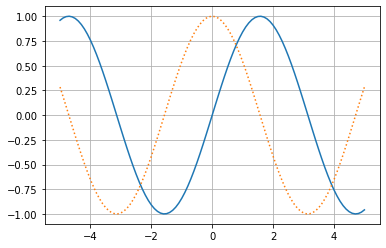

In [242]:
def fu(x):
    y = np.sin(x)
    return y
def dfu(x):
    y = np.cos(x)
    return y

x=np.linspace(-5., 5., 101)
plt.plot(x, fu(x))
plt.plot(x, dfu(x), ':')
plt.grid()
root = newton_raphson_bisection(fu, dfu, -1.402965136506737759, -1.412965136506737759, 1e-8,maxiter=50)


### Exercises

**Exercise 5**

Determine *all* roots of the polynomial [equation](https://www.wolframalpha.com/input/?i=x%5E3%E2%88%923.23x%5E2%E2%88%925.54x%2B9.84%3D0) $x^3 − 3.23 x^2 − 5.54 x + 9.84 = 0$ to at least nine correct decimals using an algorithm of your own choice.

(-50.0, 50.0)

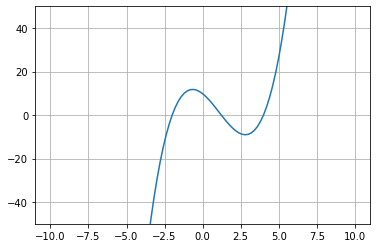

In [264]:
def ex5fu(x):
    y = x**3 - 3.23 * x**2 - 5.54*x + 9.84
    return y

def dex5fu(x):
    y = 3*x**2 -3.23 * 2 * x -5.54
    return y

x = np.linspace(-10., 10, 101)
plt.plot(x, ex5fu(x))
plt.grid()
plt.ylim(-50, 50)

In [263]:
for lo, hi in rootsearch(ex5fu, -5.0, 5.0, 50):
    print(lo, '<', hi)
    print(newton_raphson(ex5fu, dex5fu, lo, hi, tol = 1e-9))

-2.1999999999999997 < -1.9999999999999998
-2.0
1.2000000000000002 < 1.4000000000000001
1.23
3.8000000000000007 < 4.000000000000001
4.0


**Exercise 6**

The [golden ratio](https://www.wikiwand.com/en/Golden_ratio) $\phi$ is a number that is often referred to in art, but that also occurs in nature. Among other things, it has the property that it equals the average of its square and its inverse, i.e. $\phi = \frac{\phi^2+1/\phi}{2}$. Note that this equation has three solutions, only one of which is the golden ratio.

Determine the value of the golden ratio by solving the aforementioned equation to twelve digits accuracy. Compare the output of your own `secant()` and `newton_raphson()` methods to that of the [newton](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) method of the `scipi.optimize` module, which can be used to execute either method by providing a derivative function or not.

1.0 < 1.02
1.6 < 1.62
1.618033988749895
1.618033988749895
1.618033988749895


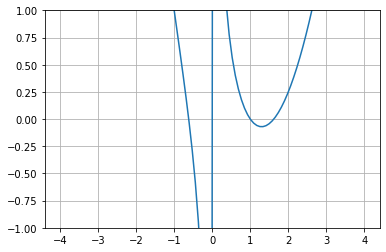

In [331]:
#phi = 1.618033988749

def ex6(phi):
    y = ((phi ** 2 + 1/phi) / 2) - phi
    return y
def dex6(phi):
    y = phi - 1/(2*phi**2) - 1
    return y

x = np.linspace(-4., 4, 100) # if even, 0 is not included then no error message, but pol stelle is not detected

for lo, hi in rootsearch(ex6, 1.0, 2.0, 50): # detects polstelle as root
    print(lo, '<', hi)

print(secant(ex6, lo, hi, tol = 1e-9))
print(newton_raphson(ex6, dex6, lo, hi, tol = 1e-9))

from scipy.optimize import newton
print(newton(ex6, x0 = lo, x1 = hi, tol = 1e-9))

plt.plot(x, ex6(x))
plt.grid()
plt.ylim([-1, 1])
plt.show()

**Exercise 7**

A solution of the [equation](https://www.wolframalpha.com/input/?i=plot+tan%28x%29%3Dtanh%28x%29+from+0+to+12) $\tan(x) = \tanh(x)$ lies in $(7.0, 7.4)$. Find this solution with at least six decimal place accuracy using the various methods from this lesson. (If necessary, look up the derivatives of these functions online.)

19
7.068583 -0.000000
7.068583
7.068583


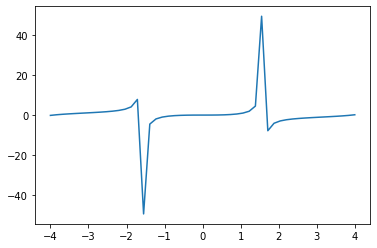

In [302]:
def ex7(x):
    y = np.tan(x) - np.tanh(x)
    return y

def dex7(x):
    y = (1 / (np.cos(x))**2) - (1 - (np.tanh(x))**2)
    return y
plt.plot(x, ex7(x))


print('%1.6f %1.6f' %bisection_2(ex7, 7.0, 7.4, tol=1e-6))
print('%1.6f' %secant(ex7, 7.0, 7.4, tol = 1e-6))
print('%1.6f' %newton_raphson(ex7, dex7, 7.0, 7.4, tol=1e-6))

(1.0, 0.0)
1.0000000000000444
1.0


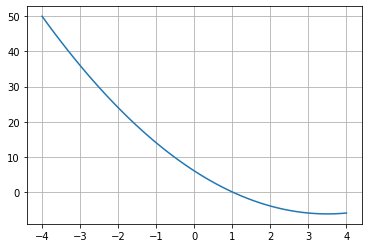

In [299]:
def ex7(x):
    y = (x - 4)*(x- 3) -6
    return y

def dex7(x):
    y = 2*x - 7
    return y

x = np.linspace(-4., 4., 50)
plt.plot(x, ex7(x))
plt.grid()


print(bisection_2(ex7, 0., 2., tol=1e-3))
print(secant(ex7, 0., 2., tol = 1e-6))
print(newton_raphson(ex7, dex7, 0., 2., tol=1e-6))

**Exercise 8**

The [Omega constant](https://en.wikipedia.org/wiki/Omega_constant) is defined as the unique value $\Omega$ that satisfies $\Omega e^\Omega = 1$. Calculate the value of this constant to 12 decimals using root finding with Newton-Raphson's method. (See e.g. [this YouTube video](https://www.youtube.com/watch?v=EjUp_5X6io4).)

0.56 < 0.5800000000000001
0.5671432904097838


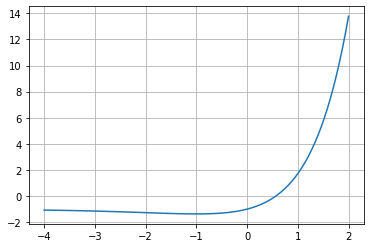

In [312]:
def ex8(om):
    y = (om * np.e ** om) - 1
    return y

def dex8(om):
    y = om * np.e ** om + np.e ** om 
    return y

x = np.linspace(-4., 2., 101)
plt.plot(x, ex8(x))
plt.grid()

for lo, hi in rootsearch(ex8, 0.0, 1.0, 50):
    print(lo, '<', hi)
    #print()
    print(newton_raphson(ex8, dex8, lo, hi, tol = 1e-12))

***